In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import scipy
from scipy import stats
import statsmodels.api as sm
### Statistical Normality Tests
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import statistics
from statistics import variance 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.stats.multicomp
from scipy.stats import chisquare
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# QUESTION NO 1

# To determine whether there is any significant difference in the diameter of the cutlet between two units
#### Ho=There is no significance difference in the diameter of the cutlet between two units

#### H1= There is a significance difference in the diameter of the cutlet between two units

In [2]:
cut = pd.read_csv("cutlets.csv")

In [3]:
cut.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cut.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
cut.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
cut.columns

Index(['Unit A', 'Unit B'], dtype='object')

In [7]:
cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


### Check weather the Sample  data is normally distributed or not with the help of shapiro Test

In [8]:
#normality test
stat,p=shapiro(cut)

In [9]:
print('statistics=%.3f.p=%.3f'%(stat,p))

statistics=0.976.p=0.204


 #As we got P=0.204, p>0.05 hence we can accept null hypothesis. here null hypothesis is saying that the cutlet data is Normal

### To find the Variance for the given sample data with the help of varience Tests

In [10]:
c=pd.DataFrame(cut)

In [11]:
cut_a=c.rename(columns={"Unit A":"sampleA","Unit B":"sampleB"})

In [12]:
cut_a.describe()

,sampleA,sampleB
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [13]:
print("Variance of sample setA = % s" %(statistics.variance(cut_a.sampleA)))

Variance of sample setA = 0.08317945374789917


In [14]:
print("Variance of sample setB = % s" %(statistics.variance(cut_a.sampleB)))

Variance of sample setB = 0.11792400440336137


### Compute  Test Statistic using Two Tailed t test we can compute that weather to accept the null hypothesis or not

In [15]:
# normalityt test
c= stats.ttest_ind(cut_a.sampleA,cut_a.sampleB)
print(c)

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)


# Interpretation

 ###### as the obtained p value is more than alpha value(0.05),P>0.05 we can accept Null hypothesis. As we observed there is no significant difference in the diameter of the cutlet between 2 units.

# QUESTION NO 2 

In [16]:
Data=pd.read_csv("labTAT.CSV")

In [17]:
Data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
Data.info

<bound method DataFrame.info of      Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0          185.35        165.53        176.70        166.13
1          170.49        185.91        198.45        160.79
2          192.77        194.92        201.23        185.18
3          177.33        183.00        199.61        176.42
4          193.41        169.57        204.63        152.60
..            ...           ...           ...           ...
115        178.49        170.66        193.80        172.68
116        176.08        183.98        215.25        177.64
117        202.48        174.54        203.99        170.27
118        182.40        197.18        194.52        150.87
119        182.09        215.17        221.49        162.21

[120 rows x 4 columns]>

In [19]:
Data.shape

(120, 4)

In [20]:
Data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [21]:
Data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [22]:
stat, p = shapiro(Data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.995, p=0.118


From the above snippet of code, we see that the p-value is >0.05 i.e,0.118>0.05 for all density groups. 
Hence, we can conclude that they follow the Gaussian Distribution.

 

### Ho=There is a difference in average TAT among the different laboratories 
### H1=There is no difference in average TAT among the different laboratories

## One-Way ANOVA Test using statsmodels module

In [23]:
 stats.f_oneway(Data["Laboratory 1"],Data["Laboratory 2"],Data["Laboratory 3"],Data["Laboratory 4"])
 

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#We see that p-value <0.05. Hence, we can reject the Null Hypothesis – there are no differences among different groups
P value=2.1156708949992414e-57,p<0.05,P low , fail to accept null hypothesis , what alternate hypothesis says "Average turn around time of all 4 laboratories are not same"

### CONCLUSION: Hence statistically Proved that Average turn around time of all 4 laboratories are not same

### Homogeneity of Variance Assumption check

In [24]:
# Levene variance test, Method 2
stats.levene(Data["Laboratory 1"],Data["Laboratory 2"],Data["Laboratory 3"],Data["Laboratory 4"])

LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)

We see that p-value >0.05 for all density groups. Hence, we can conclude that groups have equal variances.

 

In [25]:
df_a = pd.melt(Data.reset_index(), id_vars=['index'],
    value_vars=['Laboratory 1', 'Laboratory 2', 'Laboratory 3','Laboratory 4'])
df_a

,index,variable,value
0,0,Laboratory 1,185.35
1,1,Laboratory 1,170.49
2,2,Laboratory 1,192.77
3,3,Laboratory 1,177.33
4,4,Laboratory 1,193.41
...,...,...,...
475,115,Laboratory 4,172.68
476,116,Laboratory 4,177.64
477,117,Laboratory 4,170.27
478,118,Laboratory 4,150.87


In [26]:
df_a.columns = ['index', 'treatments', 'value']
df_a.columns

Index(['index', 'treatments', 'value'], dtype='object')

 generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
 easily detect the differences between different treatments

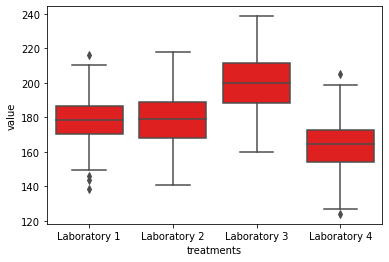

In [27]:
ax = sns.boxplot(x='treatments', y='value', data=df_a, color='red')

In [28]:
model = ols('value ~ C(treatments)', data=df_a).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),79979.167089,3.0,118.704217,2.115671e-57
Residual,106904.608903,476.0,NaN,NaN


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     118.7
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           2.12e-57
Time:                        12:56:36   Log-Likelihood:                -1978.5
No. Observations:                 480   AIC:                             3965.
Df Residuals:                     476   BIC:                             3982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       178.3616      1.368    130.376      0.000     175.673     181.050
C(treatments)[T.Laboratory 2]     0.5413      1.935      0.280      0.780      -3.260       4.343
C(treatments)[T.Laboratory 3]    21.5517      1.935     11.139      0.000      17.750      25.353
C(treatments)[T.Laboratory 4]   -14.6788      1.935     -7.587      0.000     -18.480     -10.877
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.044
Skew:                          -0.002   Prob(JB):                        0.978
Kurtosis:                       3.047   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")


Overall model F( 3, 476) =  118.704, p =  0.0000


In [31]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(treatments),79979.167089,3.0,118.704217,2.115671e-57
Residual,106904.608903,476.0,NaN,NaN


The F-statistic= 118.704 and the p-value= 0.002 which is indicating that there is an overall significant effect of treaments on laboratories. However, we don’t know where the difference between treatments is yet. So, based on the p-value we can reject the H0; that is there’s no significant difference as per treatments

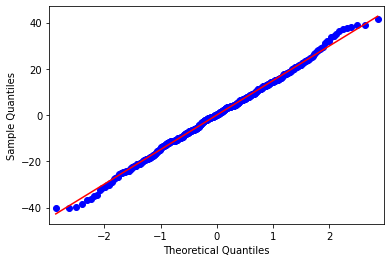

In [32]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

#From the above figure, we see that all data points lie to close to the 45-degree line and
hence we can conclude that it follows Normal Distribution.

## When we conduct an ANOVA, we are attempting to determine if there is a statistically significant difference among the groups. So what if we find statistical significance?

##### If we find that there is a difference, we will then need to examine where the group differences lay. So, we’ll use the Tukey HSD test to identify where the difference lies

In [33]:
mc = statsmodels.stats.multicomp.MultiComparison(df_a['value'],df_a['treatments'])
mc_results = mc.tukeyhsd()
print(mc_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
Laboratory 1 Laboratory 2   0.5413   0.9  -4.4468   5.5294  False
Laboratory 1 Laboratory 3  21.5517 0.001  16.5636  26.5398   True
Laboratory 1 Laboratory 4 -14.6788 0.001 -19.6669  -9.6907   True
Laboratory 2 Laboratory 3  21.0103 0.001  16.0222  25.9984   True
Laboratory 2 Laboratory 4 -15.2202 0.001 -20.2083 -10.2321   True
Laboratory 3 Laboratory 4 -36.2305 0.001 -41.2186 -31.2424   True
-----------------------------------------------------------------


Tuckey HSD test clearly says that there’s a significant difference between Group1 – Group2 

# QUESTION NO 3

 ## Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


### Ho: all Proportions are equal

### H1:Not all Proportions are equal

In [34]:
B_R=pd.read_csv('BuyerRatio.csv')
B_R

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [35]:
from scipy.stats import chi2_contingency 

In [36]:
chi2_contingency(B_R)

TypeError: '<' not supported between instances of 'str' and 'int'

In [37]:
c=B_R['Observed Values']=B_R['Observed Values'].map({'Males':0,'Females':1})
c

0    0
1    1
Name: Observed Values, dtype: int64

In [38]:
df=B_R.T
df

,0,1
Observed Values,0,1
East,50,435
West,142,1523
North,131,1356
South,70,750


In [39]:
chi2_contingency(df)

(1.6929696469183673,
 0.7919942975413565,
 4,
 array([[8.81561238e-02, 9.11843876e-01],
        [4.27557201e+01, 4.42244280e+02],
        [1.46779946e+02, 1.51822005e+03],
        [1.31088156e+02, 1.35591184e+03],
        [7.22880215e+01, 7.47711978e+02]]))

In [40]:
count=pd.crosstab(df[0],df[1])
count

1,1,435,750,1356,1523
0,,,,,
0,1,0,0,0,0
50,0,1,0,0,0
70,0,0,1,0,0
131,0,0,0,1,0
142,0,0,0,0,1


In [41]:
dof=chi2_contingency(B_R)[2]
dof

4

In [42]:
from scipy.stats import chi2
significance = 0.05
p = 1 - significance
dof = chi2_contingency(B_R)[2]
critical_value = chi2.ppf(p, dof)
critical_value

9.487729036781154

In [43]:
p = chi2.cdf(critical_value, dof)
p

0.95

In [44]:
chi, pval, dof, exp = chi2_contingency(B_R)
chi, pval, dof, exp


(1.6929696469183673,
 0.7919942975413565,
 4,
 array([[8.81561238e-02, 4.27557201e+01, 1.46779946e+02, 1.31088156e+02,
         7.22880215e+01],
        [9.11843876e-01, 4.42244280e+02, 1.51822005e+03, 1.35591184e+03,
         7.47711978e+02]]))

In [45]:
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
Not all Proportions are equal
.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
 all Proportions are equal
""" % (significance))
    

p-value is:  0.7919942975413565
chi=1.692970, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
 all Proportions are equal



Here from the above data if u observe P-value>0.05 we Accept Null Hypothesis
Proportion Of buyersratio Across all the Regions Should Be Same  Statistically Proved

# QUSTION NO. 4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences



Ho: The defective % not varies by centre.

H1: The defective % varies by centre.

In [46]:
customer = pd.read_csv("Costomer+OrderForm.csv")
customer

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [47]:
customer.info

<bound method DataFrame.info of     Phillippines   Indonesia       Malta       India
0     Error Free  Error Free   Defective  Error Free
1     Error Free  Error Free  Error Free   Defective
2     Error Free   Defective   Defective  Error Free
3     Error Free  Error Free  Error Free  Error Free
4     Error Free  Error Free   Defective  Error Free
..           ...         ...         ...         ...
295   Error Free  Error Free  Error Free  Error Free
296   Error Free  Error Free  Error Free  Error Free
297   Error Free  Error Free   Defective  Error Free
298   Error Free  Error Free  Error Free  Error Free
299   Error Free   Defective   Defective  Error Free

[300 rows x 4 columns]>

In [48]:
customer.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [49]:
customer['Phillippines']=customer['Phillippines'].map({'Error Free':0,'Defective':1})
customer['Indonesia']=customer['Indonesia'].map({'Error Free':0,'Defective':1})
customer['Malta']=customer['Malta'].map({'Error Free':0,'Defective':1})
customer['India']=customer['India'].map({'Error Free':0,'Defective':1})


In [50]:
customer_a=pd.DataFrame([customer.Phillippines,customer.Indonesia,customer.Malta,customer.India])
df_a=customer_a.T
df_a

,Phillippines,Indonesia,Malta,India
0,0,0,1,0
1,0,0,0,1
2,0,1,1,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
295,0,0,0,0
296,0,0,0,0
297,0,0,1,0
298,0,0,0,0


In [51]:
sust=pd.get_dummies(customer)

In [52]:
sust

,Phillippines,Indonesia,Malta,India
0,0,0,1,0
1,0,0,0,1
2,0,1,1,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
295,0,0,0,0
296,0,0,0,0
297,0,0,1,0
298,0,0,0,0


In [53]:
stat, p = shapiro(customer)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.330, p=0.000


In [54]:
stats.f_oneway(customer['Phillippines'],customer['Indonesia'],customer['Malta'],customer['India'])

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

In [55]:
mc = statsmodels.stats.multicomp.MultiComparison(cust_ord['value'],cust_ord['treatments'])
mc_results = mc.tukeyhsd()
print(mc_results)

NameError: name 'cust_ord' is not defined

### p>0.05 we accept null hypothesis, that there is a defect varies by a center and the Tukeyhsd states that there is a significant different among the groups 

# QUESTION NO 5

## Fantaloons Sales managers commented that % of males versus females walking in to the store differ based on day of the week. Analyze the data and determine whether there is evidence at 5 % significance level to support this hypothesis.
 


### Ho: % of males versus females walking in to the store not differ based on day of the week

### H1: % of males versus females walking in to the store differ based on day of the week

In [56]:
fantloon = pd.read_csv("Faltoons.csv")
fantloon

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female
...,...,...
395,Female,Male
396,Female,Female
397,Female,Female
398,Female,Male


In [57]:
ft.isnull().sum()

NameError: name 'ft' is not defined

In [58]:
ft.info

NameError: name 'ft' is not defined

In [59]:
ft.dropna

NameError: name 'ft' is not defined

In [60]:
fantloon['Weekdays']=fantloon['Weekdays'].map({'Male':0,'Female':1})
fantloon['Weekend']=fantloon['Weekend'].map({'Male':0,'Female':1})
fantloon.head(2)

,Weekdays,Weekend
0,0,1
1,1,0


In [61]:
fant=pd.crosstab(fantloon.Weekdays,fantloon.Weekend)
fant

Weekend,0,1
Weekdays,,
0,47,66
1,120,167


In [62]:
count = np.array([47,66]) #How many men and women are  females walking in to the store 
nobs = np.array([120, 167]) #total number of people coming 

In [63]:
#Alternative The alternative hypothesis can be either two-sided or one of the one- sided tests
#smaller means that the alternative hypothesis is prop < value
#larger means prop > value.
# two. sided -> means checking for equal proportions of Adults and children under purchased
# p-value  < 0.05 accept alternate hypothesis i.e.


In [64]:
stat, pval_a = proportions_ztest(count, nobs,alternative='two-sided') 
stat, pval_a

(-0.06059497248502743, 0.9516817775441105)

### p = 0.951,p>0.05, P high Null fly, Acccept Null hypothesis, what null Hypothesis says is "equal Proportions"



### CONCLUSION : sales manager commit to start fantaloons sales at weekends and weekdays both , why Because Both The days sales with respect to male Vs Female are walking in to the store not differ based on day of the week, statistically proved
